# Análisis de los datos históricos de existencias/ingresos y creación de un cuadro de mando

In [44]:
!pip install yfinance

In [45]:
!pip install matplotlib

In [46]:
!pip install requests beautifulsoup4 pandas

In [47]:
!pip install requests beautifulsoup4

In [12]:
!pip install dash plotly yfinance requests beautifulsoup4 pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 12.2 MB/s eta 0:00:00
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/conda/etc/jupyter/nbconfig/notebook.d/dash.json'
Consider using the `--user` option or check the permissions.



In [48]:
!pip install selenium


## Extracción de datos de acciones de Tesla utilizando yfinance

Nombre de la empresa: Tesla, Inc.
Sector: Consumer Cyclical
                                 Open        High         Low       Close  \
Date                                                                        
2023-12-20 00:00:00-05:00  256.410004  259.839996  247.000000  247.139999   
2023-12-21 00:00:00-05:00  251.899994  254.800003  248.550003  254.500000   
2023-12-22 00:00:00-05:00  256.760010  258.220001  251.369995  252.539993   
2023-12-26 00:00:00-05:00  254.490005  257.970001  252.910004  256.609985   
2023-12-27 00:00:00-05:00  258.350006  263.339996  257.519989  261.440002   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-12-20 00:00:00-05:00  125097000        0.0           0.0  
2023-12-21 00:00:00-05:00  109594200        0.0           0.0  
2023-12-22 00:00:00-05:00   93249800        0.0           0.0  
2023-12-26 00:00:00-05:00   86892400        0.0           0.0  
2023-12-27 00:00

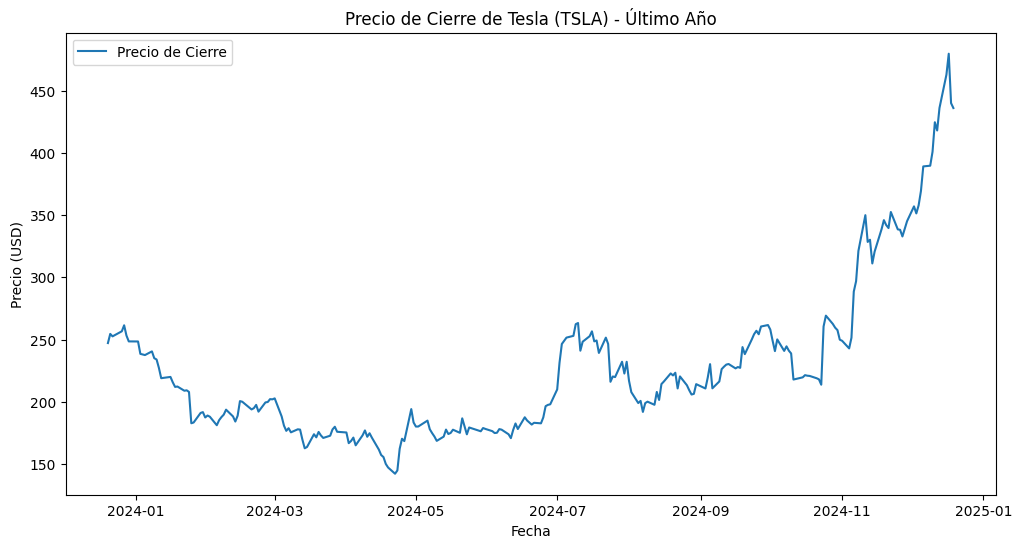

In [49]:
import yfinance as yf

# Descargar datos de Tesla (TSLA)
tesla_data = yf.Ticker("TSLA")

# Información básica de la empresa
info = tesla_data.info
print("Nombre de la empresa:", info['longName'])
print("Sector:", info['sector'])

# Descargar datos históricos de precios
data_hist = tesla_data.history(period="1y")  # Último año de datos
print(data_hist.head())

# Gráfica de precios
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_hist['Close'], label="Precio de Cierre")
plt.title("Precio de Cierre de Tesla (TSLA) - Último Año")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

## Extracción de datos de ingresos de Tesla utilizando Webscraping 

In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for Tesla (TSLA) stock data
tsla_url = "https://finance.yahoo.com/quote/TSLA/financials/?p=TSLA"

# Function to scrape the stock data for TSLA
def extract_tsla_data(url):
    # Send a GET request to the URL
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the financials table
    table = soup.find_all('table')[0]  # Assuming the financials table is the first table
    
    # Extract the headers of the table
    headers = [th.text.strip() for th in table.find_all('th')]
    
    # Extract the rows of the table
    rows = table.find_all('tr')[1:]  # Skip the header row
    
    # Initialize an empty list to store the data
    data = []
    
    for row in rows:
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    
    # Convert the data into a DataFrame
    df = pd.DataFrame(data, columns=headers)
    
    return df

# Extract stock data for TSLA
tsla_data = extract_tsla_data(tsla_url)

# Display the first 5 rows of the TSLA DataFrame
print("TSLA Financial Data:")
print(tsla_data.head())


TSLA Financial Data:
Empty DataFrame
Columns: []
Index: []


## Extracción de datos de acciones de GameStop utilizando yfinance

Nombre de la empresa: GameStop Corp.
Sector: Consumer Cyclical
                                Open       High        Low      Close  \
Date                                                                    
2023-12-20 00:00:00-05:00  17.530001  18.379999  16.889999  16.930000   
2023-12-21 00:00:00-05:00  17.190001  17.340000  16.590000  16.980000   
2023-12-22 00:00:00-05:00  16.780001  17.200001  16.450001  16.969999   
2023-12-26 00:00:00-05:00  16.980000  17.410000  16.820000  17.360001   
2023-12-27 00:00:00-05:00  17.430000  18.370001  17.370001  18.370001   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-12-20 00:00:00-05:00  5553000        0.0           0.0  
2023-12-21 00:00:00-05:00  3975300        0.0           0.0  
2023-12-22 00:00:00-05:00  3325100        0.0           0.0  
2023-12-26 00:00:00-05:00  3079600        0.0           0.0  
2023-12-27 00:00:00-05:00  4800100        0.0        

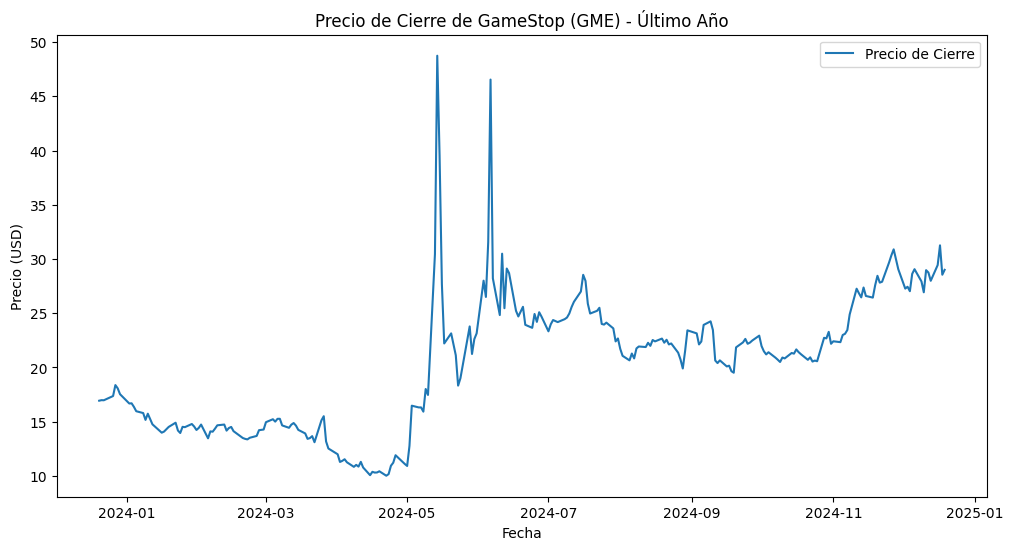

In [1]:
import yfinance as yf

# Descargar datos de GameStop (GME)
gamestop_data = yf.Ticker("GME")

# Información básica de la empresa
info = gamestop_data.info
print("Nombre de la empresa:", info['longName'])
print("Sector:", info['sector'])

# Descargar datos históricos de precios
data_hist = gamestop_data.history(period="1y")  # Último año de datos
print(data_hist.head())

# Gráfica de precios
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_hist['Close'], label="Precio de Cierre")
plt.title("Precio de Cierre de GameStop (GME) - Último Año")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

##  Extracción de datos de ingresos de GameStop utilizando web scraping

In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for GameStop (GME) stock data
gme_url = "https://finance.yahoo.com/quote/GME/financials/?p=GME"

# Function to scrape the stock data for GME
def extract_gme_data(url):
    # Send a GET request to the URL
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the financials table
    table = soup.find_all('table')[0]  # Assuming the financials table is the first table
    
    # Extract the headers of the table
    headers = [th.text.strip() for th in table.find_all('th')]
    
    # Extract the rows of the table
    rows = table.find_all('tr')[1:]  # Skip the header row
    
    # Initialize an empty list to store the data
    data = []
    
    for row in rows:
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    
    # Convert the data into a DataFrame
    df = pd.DataFrame(data, columns=headers)
    
    return df

# Extract stock data for GME
gme_data = extract_gme_data(gme_url)

# Display the first 5 rows of the GME DataFrame
print("GME Financial Data:")
print(gme_data.head())


GME Financial Data:
Empty DataFrame
Columns: []
Index: []


## Tablero de acciones e ingresos de Tesla

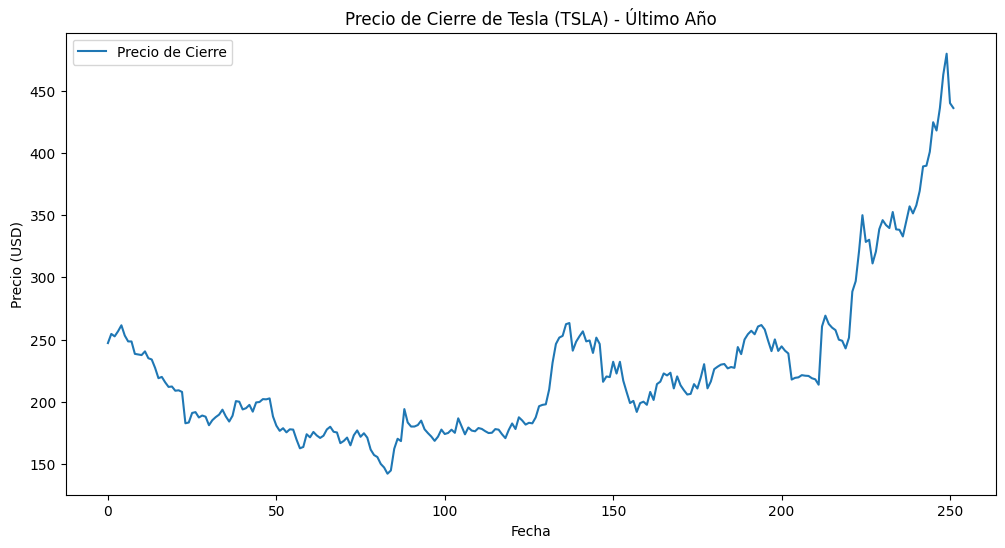

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir la función make_graph
def make_graph(data, title="Tesla Stock Data"):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label="Precio de Cierre")
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.show()

# Descargar datos de Tesla (TSLA)
tesla_data = yf.Ticker("TSLA")

# Descargar datos históricos de precios
data_hist = tesla_data.history(period="1y")  # Último año de datos

# Restablecer el índice
data_hist_reset = data_hist.reset_index()

# Llamar a la función make_graph para graficar
make_graph(data_hist_reset, "Precio de Cierre de Tesla (TSLA) - Último Año")


## Tablero de acciones e ingresos de GameStop

In [14]:
import yfinance as yf
import requests
import pandas as pd
import plotly.graph_objs as go
from bs4 import BeautifulSoup
import dash
from dash import dcc, html

# Set up the Dash app
app = dash.Dash(__name__)

# Download stock data for GameStop
gamestop_data = yf.Ticker("GME")
gamestop_hist = gamestop_data.history(period="1y")  # Last year of data

# Financials data scraping function
def extract_gme_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find_all('table')[0]  # Assuming the first table contains financials
    headers = [th.text.strip() for th in table.find_all('th')]
    rows = table.find_all('tr')[1:]  # Skip header row
    data = []
    for row in rows:
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    return pd.DataFrame(data, columns=headers)

# URL for GameStop's financial data
gme_url = "https://finance.yahoo.com/quote/GME/financials/?p=GME"
gme_financials = extract_gme_data(gme_url)

# Plot GameStop stock prices
stock_trace = go.Scatter(
    x=gamestop_hist.index,
    y=gamestop_hist['Close'],
    mode='lines',
    name='Close Price'
)

# Create the layout for the dashboard
app.layout = html.Div([
    html.H1('GameStop (GME) Dashboard'),
    
    # Stock price graph
    dcc.Graph(
        id='stock-price-graph',
        figure={
            'data': [stock_trace],
            'layout': go.Layout(
                title='GameStop Stock Price (Last Year)',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Price (USD)'},
            )
        }
    ),
    
    # GameStop financials table
    html.H2('GameStop Financial Data'),
    html.Div([
        html.Table([
            html.Tr([html.Th(col) for col in gme_financials.columns])] + 
            [html.Tr([html.Td(gme_financials.iloc[i][col]) for col in gme_financials.columns]) for i in range(min(len(gme_financials), 5))])
    ])
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
